In [ ]:
#kütüphaneleri yükle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Veri dosyasını yükle
df_train=pd.read_csv("/kaggle/input/titanic/train.csv")
df_test=pd.read_csv("/kaggle/input/titanic/test.csv")

In [ ]:
#Veri ön işleme ve EDA
df_train.head()

In [ ]:
#veriseti hakkında bilgi
df_train.info()

In [ ]:
#eksik veri kontrolü
df_train.isnull().sum()

In [ ]:
df_train.describe().T

In [ ]:
#veri ön işleme işlemleri yapılacağı için test ve train birleştirilir
df=pd.concat([df_train,df_test],ignore_index=True)
df

In [ ]:
#satır sütun sayısı
df_train.shape,df_test.shape,df.shape #ilk 891 i train, son 418 i test

In [ ]:
df.head()

In [ ]:
#numeric özellikler
numeric_columns=df.select_dtypes(include=['number'])
numeric_columns

In [ ]:
# Her çalışmada anlamlı çıkacak diye bir kural
numeric_columns.corr()

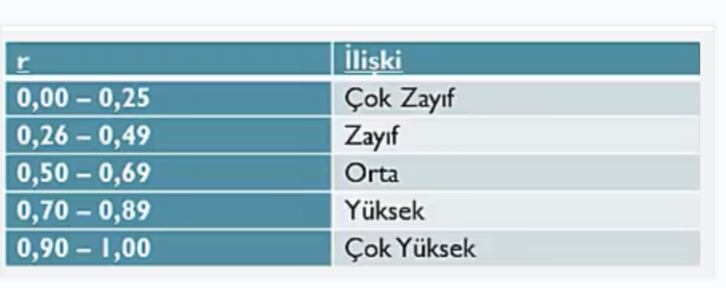

In [ ]:
sns.countplot(x="Pclass", hue="Survived",data=df_train)

In [ ]:
sns.countplot(x="Survived", hue="Pclass",data=df_train)

In [ ]:
#Name sütunu
df['Name'].head()

In [ ]:
#Unvanları alalım
df['Title']=df['Name'].str.extract('([A-Za-z]+)\.')

In [ ]:
#hangi unvanlar var
df['Title'].value_counts()

In [ ]:
#Fransızca veya diğer dillerdeki ünvanları uygn şekilde çevirdik
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer'],'Mr')

In [ ]:
df['Title'].value_counts()

In [ ]:
#Embarked ekiks veiryi doldur
#en çok tekrar eden değeri kullan
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True) #df['Embarked'].mode()[0] birden fazla mod olabilir o yüzden ilkini al
df['Embarked'].isnull().sum()

In [ ]:
df['Age'].isnull().sum()

In [ ]:
#Yaş değerlerini doldur
df['Age'].fillna(df.groupby('Title')['Age'].transform('mean'),inplace=True) # unvanların yaş ortalamalarına göre eksik yaşları doldur
df['Age'].isnull().sum()

In [ ]:
df.isnull().sum()

In [ ]:
# Bilet ücreti
df['Fare'].mean()

In [ ]:
df['Fare'].median()

In [ ]:
df['Fare'].fillna(df['Fare'].median(),inplace=True)
#df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
#ÖZellikler ve hedef değişkenkerini belirle
y=df['Survived']
X=df.drop(['Survived','PassengerId','Name', 'Ticket','Cabin'],axis=1)
X.head()

In [ ]:
y

In [ ]:
#Kategorik verileri sayısal verilere çevirir
#One Hot Encoding
X=pd.get_dummies(X,drop_first=True) #Feature Engineering özellik mühendisliği
#Pclass aslında sayısal bir veri değil önce dtype objeye çevireceksiniz sonra dummies yapacaksınız

In [ ]:
X

In [ ]:
df['Embarked'].unique()

In [ ]:
#Train ve testi aşağıdaki gibi ayırıyoruz
X_train=X[:891] #Train veri setinde ilk 891
X_test=X[891:]
y_train=y[:891]
y_test=y[891:]

In [ ]:
#Tahminlerin gerçek değerleri yraışmalarda bizden gizlenir
y_test

In [ ]:
#Model Kütüphaneleri
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import BernoulliNB
#metrikler
from sklearn.model_selection import cross_val_score
#accuaracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
def model_classification(X,y):
    '''
    X: independent variable
    y: dependent variable
    return best model and its accuracy
    '''
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
    models = [GaussianNB(),BernoulliNB(),LogisticRegression(),RandomForestClassifier(), 
              GradientBoostingClassifier(), KNeighborsClassifier(n_neighbors=5)]
    results=[]
    for model in models:
        model.fit(x_train,y_train)
        model_predict=model.predict(x_test)
        print("Model: ",model)
        print("Model Accuracy: ",accuracy_score(model_predict,y_test))
        print("Model Confusion Matrix: ",confusion_matrix(model_predict,y_test),"\n")
        print("Model Classification Report: ",classification_report(model_predict,y_test))
        print("-"*50)
        results.append(accuracy_score(model_predict,y_test))
    #best model
    best_model=models[results.index(max(results))]
    print("Best Model: ",best_model)
    print("Best Model Accuracy: ",max(results))
    models=pd.DataFrame({
        'Model':['GaussianNB','BernoulliNB','LogisticRegression','RandomForestClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier'],
        'Score':results})
    print(models.sort_values(by='Score', ascending=False, ignore_index=True))
    return best_model,max(results), confusion_matrix(model_predict,y_test)

In [ ]:
model_classification(X_train,y_train)

In [ ]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)# Testi kaggle üzeirnden yapacağımız için artık veri setini bölmeden elimizdeki tüm veri setini gönderiyoruz.
y_pred=gb.predict(X_test)
y_pred

In [ ]:
#from all_class import all_classification_models

In [ ]:
submission = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_pred.astype(int)})
submission

In [ ]:
submission.to_csv('submission.csv', index=False) #data frame i csv dosyası oalrak kaydediyor